In [1]:
import numpy as np
import pandas as pd
import igraph as ig
import vmlab

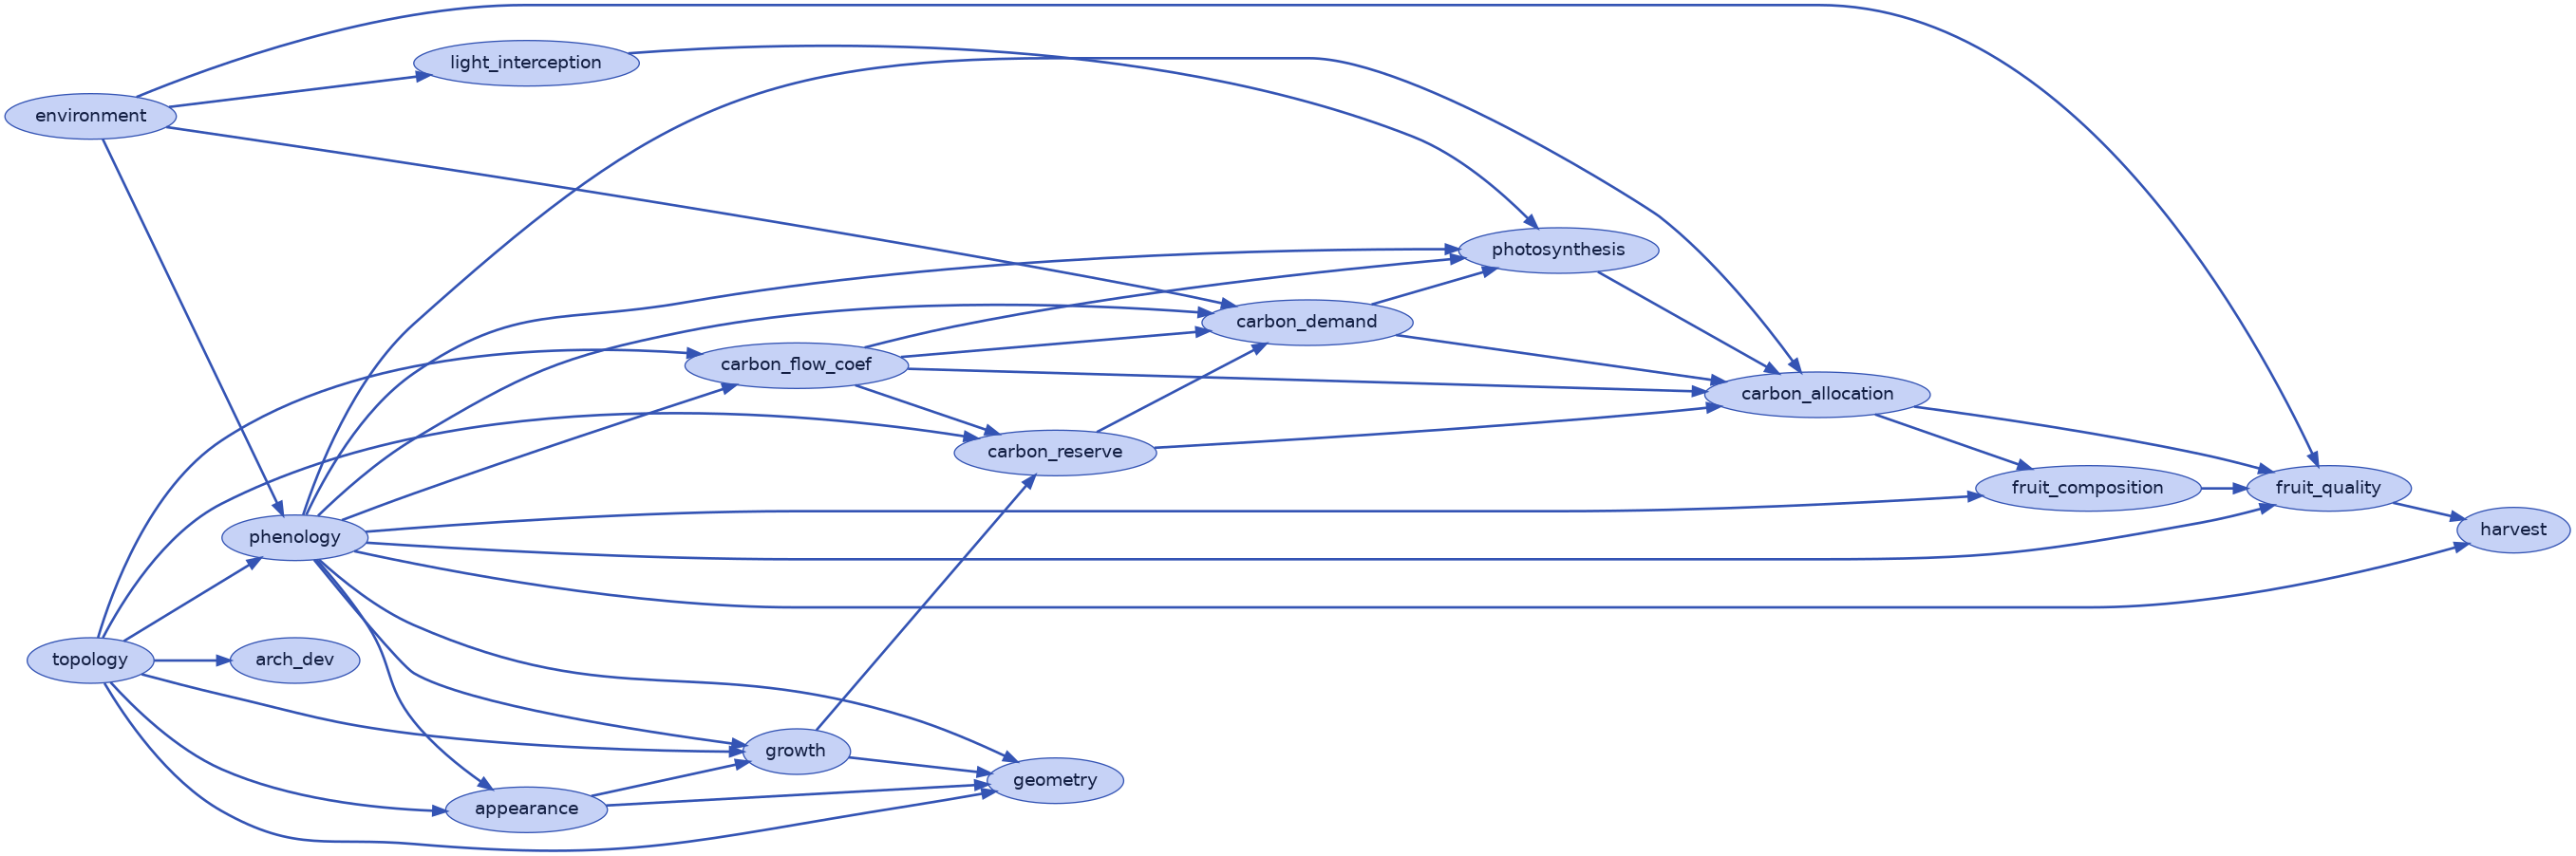

In [2]:
from vmlab.models import fruit_model
from vmlab.processes import harvest
fruit_model = fruit_model.update_processes({'harvest': harvest.HarvestByQuality})
fruit_model.visualize()

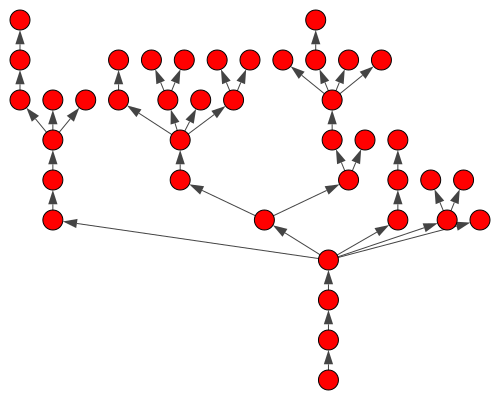

In [3]:
tree = pd.read_csv('../share/trees/branch_G3.csv')
graph = vmlab.load_graph(tree)
vmlab.check_graph(graph)
layout = graph.layout_reingold_tilford()
layout.rotate(-180)
ig.plot(graph, bbox=(0,0,500,400), layout=layout)

In [4]:
setup = vmlab.create_setup(
    model=fruit_model,
    tree=tree,
    start_date='2002-06-01',
    end_date='2003-06-01',
    setup_toml='../share/setup/fruit_model_branch.toml',
    current_cycle=3,
    input_vars={
        'growth__leaf_senescence_enabled': False,
        'carbon_flow_coef__max_distance_to_fruit': 3,
        'geometry__interpretation_freq': 1
    },
    output_vars={
        'topology': {
            'adjacency': 'day'
        },
        'environment': {
            'TM_day': 'day',
            'RH_day': 'day'
        },
        'carbon_allocation': {
            'DM_fruit': 'day',
            'DM_fleshpeel': 'day',
            'DM_flesh': 'day'
        },
        'carbon_flow_coef': {
            'distances': 'day'
        },
        'harvest': {
            'ripeness_index': 'day',
            'nb_fruit_harvested': None
        },
        'growth': {
            'nb_leaf': None,
        },
        'fruit_quality': {
            'FM_fruit': 'day',
            'W_fleshpeel': 'day',
            'W_flesh': 'day',
            'transpiration_fruit': 'day',
            'osmotic_pressure_fruit': 'day',
            'turgor_pressure_fruit': 'day',
            'water_potential_fruit': 'day',
            'flux_xylem_phloem': 'day',
            'sucrose': 'day'
        }
    }
)

In [5]:
ds_out = vmlab.run(setup, fruit_model, geometry=True)

SceneWidget(scenes=[{'id': 'q9jA4djIKOGwfyHtFcoAU7anp', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

             0% | initialize 

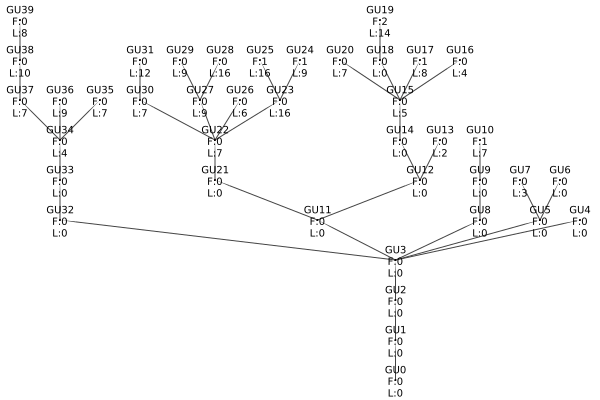

In [6]:
g = ig.Graph.Adjacency([row.tolist() for row in ds_out.topology__adjacency[-1].data.astype(np.int64)])
layout = g.layout_reingold_tilford(root=0.)
layout.rotate(-180)
ig.plot(g, layout=layout, bbox=(600, 400), **{
    'vertex_size': 1,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1,
    'vertex_label': [
        f'GU{idx}\nF:{int(ds_out.harvest__nb_fruit_harvested.data[idx])}\nL:{int(ds_out.growth__nb_leaf.data[idx])}' for idx in g.vs.indices
    ]
})

In [7]:
# how can we select all variables for GUs with at leat one fruit ? 
ds = ds_out[['fruit_quality__FM_fruit', 'carbon_allocation__DM_fruit']].sel({
        'day': slice('2003-06-01', '2004-06-01')
    }).where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).rename_vars({
        'fruit_quality__FM_fruit': 'FM',
        'carbon_allocation__DM_fruit': 'DM',
    })
ds

<xarray.Dataset>
Dimensions:  (GU: 0, day: 0)
Coordinates:
  * day      (day) datetime64[ns] 
  * GU       (GU) int32 
Data variables:
    FM       (day, GU) float32 
    DM       (day, GU) float32

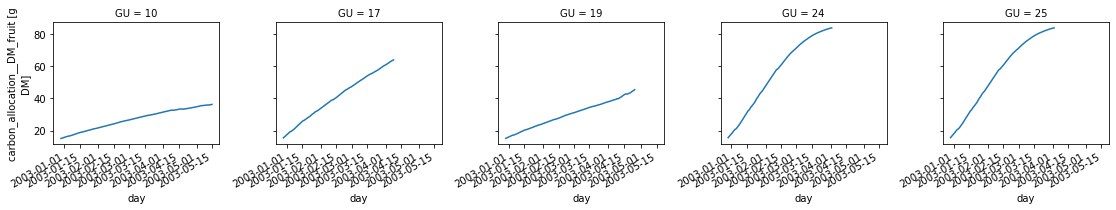

In [8]:
ds_out.carbon_allocation__DM_fruit.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)
#ds.DM.plot(col='GU', col_wrap=6)

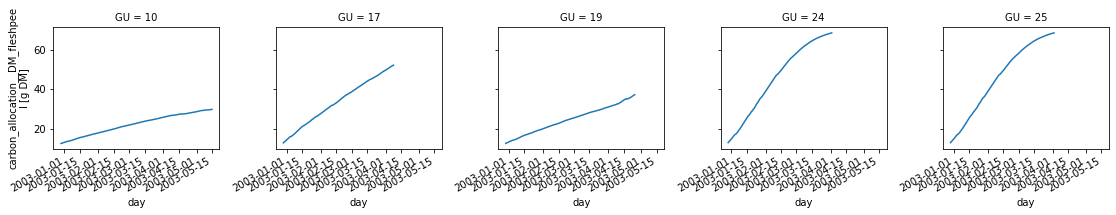

In [9]:
ds_out.carbon_allocation__DM_fleshpeel.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

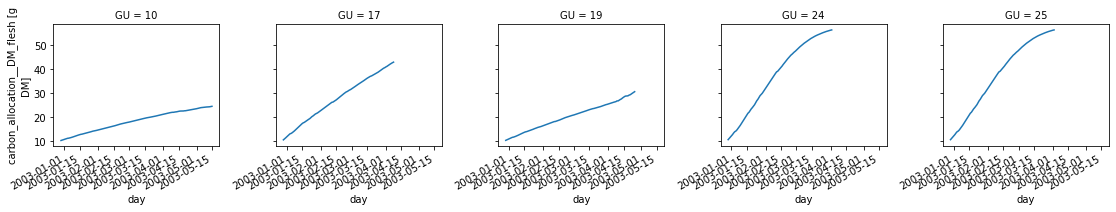

In [10]:
ds_out.carbon_allocation__DM_flesh.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

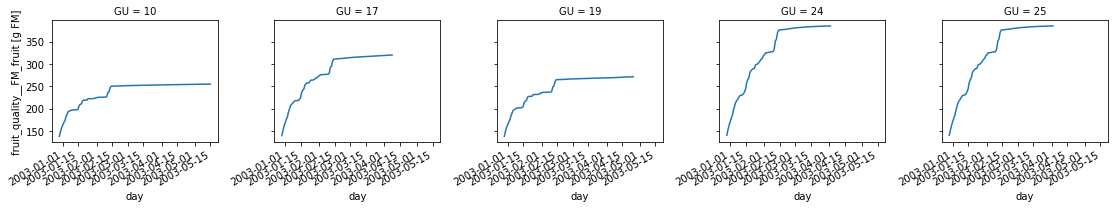

In [11]:
ds_out.fruit_quality__FM_fruit.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)
#ds.FM.plot(col='GU', col_wrap=6)

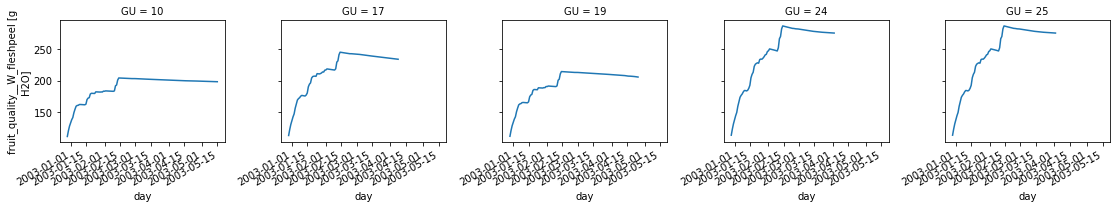

In [12]:
ds_out.fruit_quality__W_fleshpeel.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

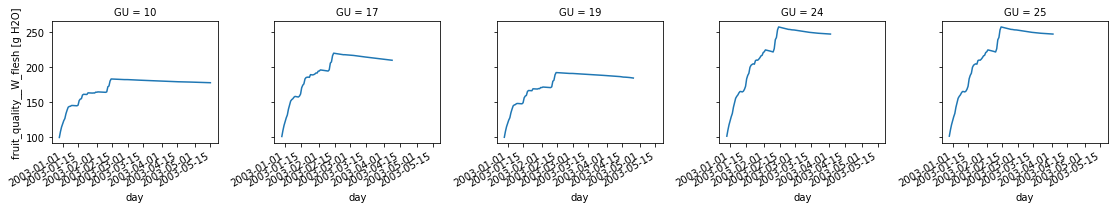

In [13]:
ds_out.fruit_quality__W_flesh.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

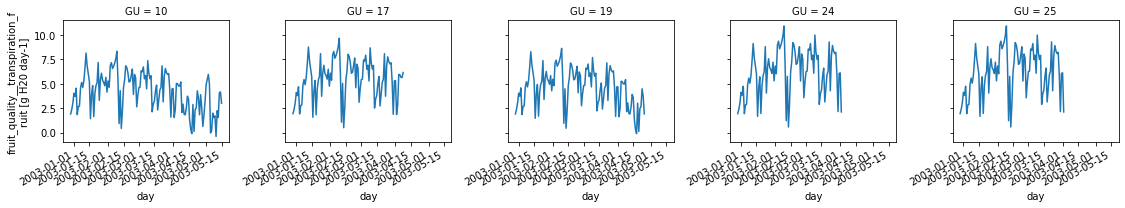

In [14]:
ds_out.fruit_quality__transpiration_fruit.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

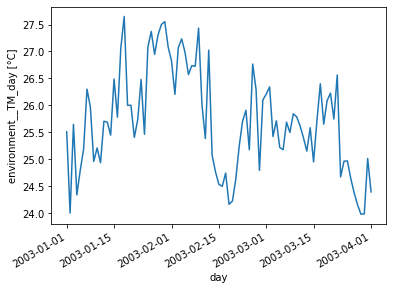

In [15]:
ds_out.environment__TM_day.sel({'day': slice('2003-01-01', '2003-04-01')}).plot(col_wrap=6)

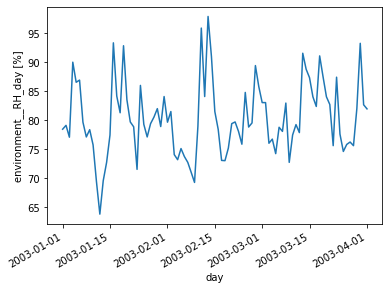

In [16]:
ds_out.environment__RH_day.sel({'day': slice('2003-01-01', '2003-04-01')}).plot(col_wrap=6)

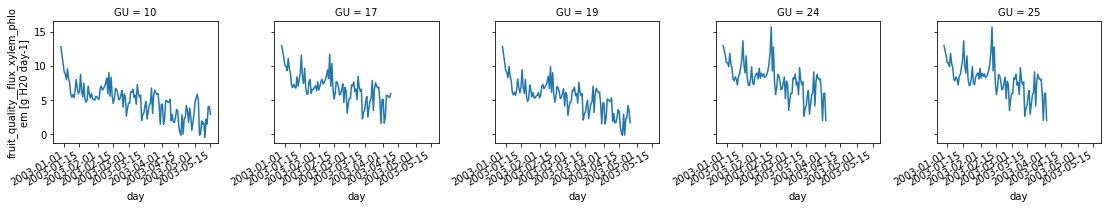

In [17]:
ds_out.fruit_quality__flux_xylem_phloem.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

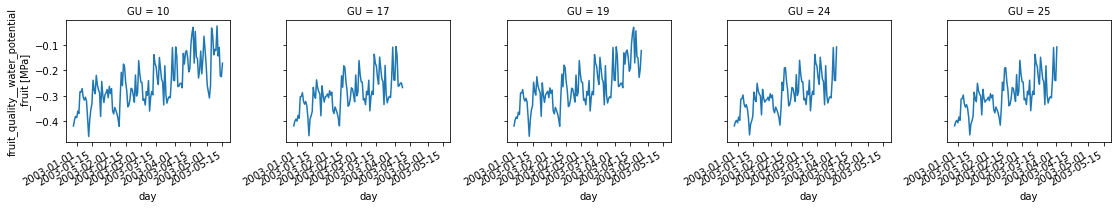

In [18]:
ds_out.fruit_quality__water_potential_fruit.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

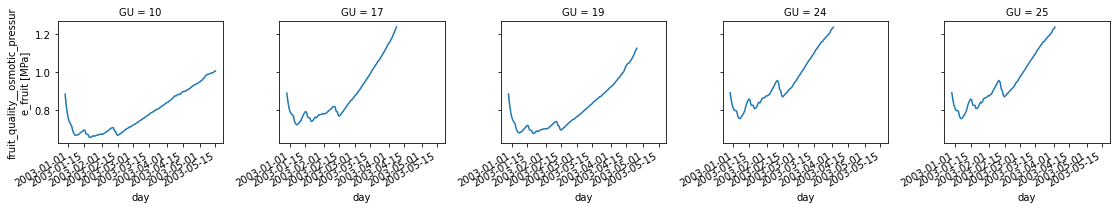

In [19]:
ds_out.fruit_quality__osmotic_pressure_fruit.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

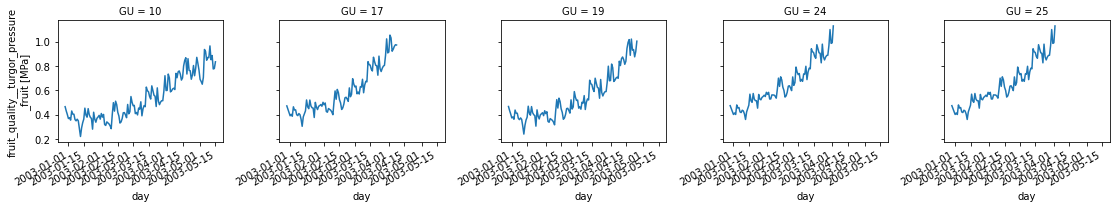

In [20]:
ds_out.fruit_quality__turgor_pressure_fruit.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

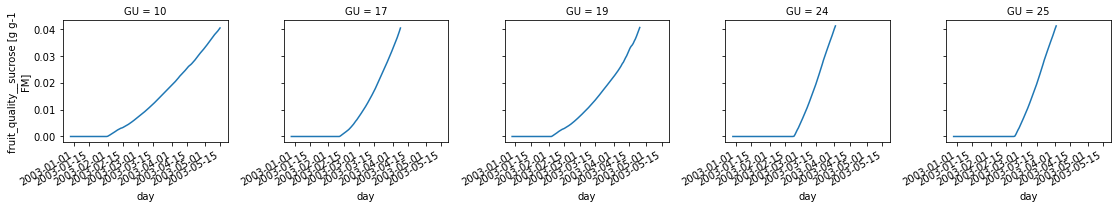

In [21]:
ds_out.fruit_quality__sucrose.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

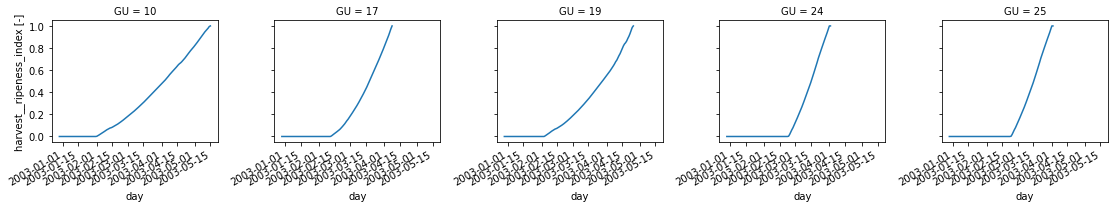

In [22]:
ds_out.harvest__ripeness_index.where(ds_out.carbon_allocation__DM_fruit > 0, drop=True).plot(col='GU', col_wrap=6)

## Visualize carbon flows

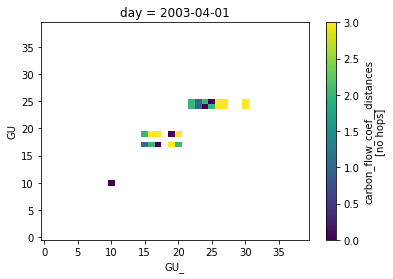

In [23]:
ds_out.carbon_flow_coef__distances.sel({'day': '2003-04-01'}).plot()

In [24]:
# extract coef form a certain date
carbon_flow_coef__distances = ds_out.carbon_flow_coef__distances.sel({'day': '2003-04-01'}).data
edges = np.nonzero(np.isfinite(carbon_flow_coef__distances))

In [25]:
g2 = ig.Graph.Adjacency([row.tolist() for row in ds_out.topology__adjacency[-1].data.astype(np.int64)])
layout2 = g2.layout_reingold_tilford()
layout2.rotate(-180)

In [26]:
g2.add_edges(np.flip(np.transpose(edges), axis=1).astype(np.int64), {'carbon_flow_coef__distances': carbon_flow_coef__distances[edges]})

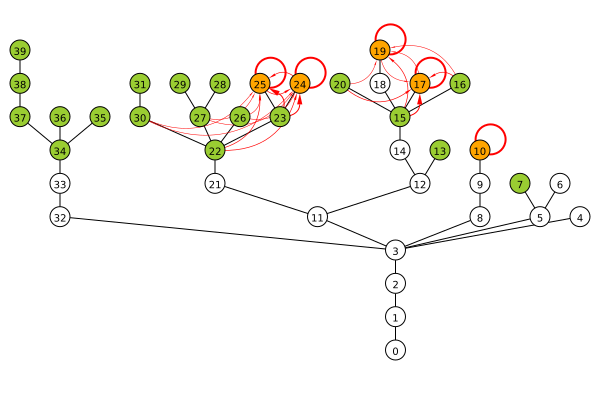

In [27]:
ig.plot(g2, layout=layout2, bbox=(600, 400), **{
    'vertex_size': 20,
    'vertex_label_size': 10,
    'vertex_label': g.vs.indices,
    'vertex_color': ['orange' if f > 0 else 'YellowGreen' if l > 0 else 'white' for f, l in zip(ds_out.harvest__nb_fruit_harvested.data, ds_out.growth__nb_leaf.data)],
    'edge_arrow_width': [1.5/(d+1) if d is not None else 0.1 for d in g2.es.get_attribute_values('carbon_flow_coef__distances')],
    'edge_arrow_size': [1.5/(d+1) if d is not None else 0.01 for d in g2.es.get_attribute_values('carbon_flow_coef__distances')],
    'edge_color': ['red' if d is not None else 'black' for d in g2.es.get_attribute_values('carbon_flow_coef__distances')],
    'edge_curved': [0.5 if d is not None else 0 for d in g2.es.get_attribute_values('carbon_flow_coef__distances')],
    'edge_width': [2/(d+1) if d is not None else 1 for d in g2.es.get_attribute_values('carbon_flow_coef__distances')]
}, margin=(20,50,20,50))